In [1]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql     
import statsmodels.api as sm

In [2]:
# import all the necessary features

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportion_confint

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.utils import resample

# 1. Data Checks

There are three datasets that I have obtained, where there is a common column on the CED (Commonwealth Electoral Divison) code, which allows me to join the Census, Electoral and Referendum data.

## Check the Census data

In [87]:
census1 = pd.read_csv('data/2021Census_G01_AUST_CED.csv')
display(census1.shape)
display(census1.head())
display(census1.columns.tolist())

(169, 109)

,CED_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,CED101,79869,83028,162893,4673,4196,8868,9699,9222,18924,...,5349,827,1243,2069,76316,78974,155288,2899,3363,6265
1,CED102,90505,91139,181643,5116,4725,9848,9074,8572,17651,...,7674,1352,1936,3290,85276,85928,171208,5012,5053,10065
2,CED103,93521,97697,191219,5407,5160,10569,11387,10682,22066,...,3742,685,971,1652,88994,92886,181881,4180,4381,8567
3,CED104,75201,77373,152571,3577,3436,7012,11415,10329,21749,...,2300,313,398,714,72665,74472,147129,1876,2477,4350
4,CED105,96511,92095,188607,6842,6475,13322,12945,12339,25283,...,9551,2864,3371,6229,88864,85178,174044,7414,6700,14114


['CED_CODE_2021',
 'Tot_P_M',
 'Tot_P_F',
 'Tot_P_P',
 'Age_0_4_yr_M',
 'Age_0_4_yr_F',
 'Age_0_4_yr_P',
 'Age_5_14_yr_M',
 'Age_5_14_yr_F',
 'Age_5_14_yr_P',
 'Age_15_19_yr_M',
 'Age_15_19_yr_F',
 'Age_15_19_yr_P',
 'Age_20_24_yr_M',
 'Age_20_24_yr_F',
 'Age_20_24_yr_P',
 'Age_25_34_yr_M',
 'Age_25_34_yr_F',
 'Age_25_34_yr_P',
 'Age_35_44_yr_M',
 'Age_35_44_yr_F',
 'Age_35_44_yr_P',
 'Age_45_54_yr_M',
 'Age_45_54_yr_F',
 'Age_45_54_yr_P',
 'Age_55_64_yr_M',
 'Age_55_64_yr_F',
 'Age_55_64_yr_P',
 'Age_65_74_yr_M',
 'Age_65_74_yr_F',
 'Age_65_74_yr_P',
 'Age_75_84_yr_M',
 'Age_75_84_yr_F',
 'Age_75_84_yr_P',
 'Age_85ov_M',
 'Age_85ov_F',
 'Age_85ov_P',
 'Counted_Census_Night_home_M',
 'Counted_Census_Night_home_F',
 'Counted_Census_Night_home_P',
 'Count_Census_Nt_Ewhere_Aust_M',
 'Count_Census_Nt_Ewhere_Aust_F',
 'Count_Census_Nt_Ewhere_Aust_P',
 'Indigenous_psns_Aboriginal_M',
 'Indigenous_psns_Aboriginal_F',
 'Indigenous_psns_Aboriginal_P',
 'Indig_psns_Torres_Strait_Is_M',
 'Indig_p

## Check the Referendum data

In [4]:
referendum = pd.read_csv('data/2023_Referendum_Merged_Fix.csv')
display(referendum.shape)
display(referendum.head())
display(referendum.columns.tolist())

(8735, 13)

,StateAb,DivisionID,DivisionName,PollingPlaceNm,YesVotes,YesPercentage,NoVotes,NoPercentage,FormalVotes,FormalPercentage,InformalVotes,InformalPercentage,TotalVotes
0,NT,306,Lingiari,Adelaide River,22,24.44,68,75.56,90,98.90,1,1.10,91
1,NT,306,Lingiari,Alice Springs,678,46.99,765,53.01,1443,99.04,14,0.96,1457
2,NT,306,Lingiari,Alice Springs PPVC,2746,44.58,3414,55.42,6160,99.23,48,0.77,6208
3,NT,307,Solomon,Bakewell,334,27.93,862,72.07,1196,98.92,13,1.08,1209
4,NT,306,Lingiari,Batchelor,51,31.29,112,68.71,163,100.00,0,0.00,163


['StateAb',
 'DivisionID',
 'DivisionName',
 'PollingPlaceNm',
 'YesVotes',
 'YesPercentage',
 'NoVotes',
 'NoPercentage',
 'FormalVotes',
 'FormalPercentage',
 'InformalVotes',
 'InformalPercentage',
 'TotalVotes']

## Check the Electoral data

In [5]:
xlsx_file_path = 'data/CED_2021_AUST.xlsx'
division = pd.read_excel(xlsx_file_path)

display(division.dtypes)
display(division.shape)
display(division.head(30))
display(division.columns.tolist())

MB_CODE_2021           object
CED_CODE_2021          object
CED_NAME_2021          object
STATE_CODE_2021        object
STATE_NAME_2021        object
AUS_CODE_2021          object
AUS_NAME_2021          object
AREA_ALBERS_SQKM      float64
ASGS_LOCI_URI_2021     object
dtype: object

(368286, 9)

,MB_CODE_2021,CED_CODE_2021,CED_NAME_2021,STATE_CODE_2021,STATE_NAME_2021,AUS_CODE_2021,AUS_NAME_2021,AREA_ALBERS_SQKM,ASGS_LOCI_URI_2021
0,10048102000,101,Banks,1,New South Wales,AUS,Australia,0.0299,http://linked.data.gov.au/dataset/asgsed3/MB/1...
1,10045180000,101,Banks,1,New South Wales,AUS,Australia,0.0271,http://linked.data.gov.au/dataset/asgsed3/MB/1...
2,10045350000,101,Banks,1,New South Wales,AUS,Australia,0.0426,http://linked.data.gov.au/dataset/asgsed3/MB/1...
3,10045360000,101,Banks,1,New South Wales,AUS,Australia,0.0484,http://linked.data.gov.au/dataset/asgsed3/MB/1...
4,10045370000,101,Banks,1,New South Wales,AUS,Australia,0.0213,http://linked.data.gov.au/dataset/asgsed3/MB/1...
5,10045380000,101,Banks,1,New South Wales,AUS,Australia,0.0149,http://linked.data.gov.au/dataset/asgsed3/MB/1...
6,10045190000,101,Banks,1,New South Wales,AUS,Australia,0.0272,http://linked.data.gov.au/dataset/asgsed3/MB/1...
7,11012490000,101,Banks,1,New South Wales,AUS,Australia,0.0179,http://linked.data.gov.au/dataset/asgsed3/MB/1...
8,10394380000,101,Banks,1,New South Wales,AUS,Australia,0.0255,http://linked.data.gov.au/dataset/asgsed3/MB/1...
9,10394390000,101,Banks,1,New South Wales,AUS,Australia,0.4374,http://linked.data.gov.au/dataset/asgsed3/MB/1...


['MB_CODE_2021',
 'CED_CODE_2021',
 'CED_NAME_2021',
 'STATE_CODE_2021',
 'STATE_NAME_2021',
 'AUS_CODE_2021',
 'AUS_NAME_2021',
 'AREA_ALBERS_SQKM',
 'ASGS_LOCI_URI_2021']

In [6]:
xlsx_file_path = 'data/SA4_2021_AUST.xlsx'
areas = pd.read_excel(xlsx_file_path)

display(areas.dtypes)
display(areas.shape)
display(areas.head())
display(areas.columns.tolist())

SA4_CODE_2021          object
SA4_NAME_2021          object
CHANGE_FLAG_2021        int64
CHANGE_LABEL_2021      object
GCCSA_CODE_2021        object
GCCSA_NAME_2021        object
STATE_CODE_2021        object
STATE_NAME_2021        object
AUS_CODE_2021          object
AUS_NAME_2021          object
AREA_ALBERS_SQKM      float64
ASGS_LOCI_URI_2021     object
dtype: object

(108, 12)

,SA4_CODE_2021,SA4_NAME_2021,CHANGE_FLAG_2021,CHANGE_LABEL_2021,GCCSA_CODE_2021,GCCSA_NAME_2021,STATE_CODE_2021,STATE_NAME_2021,AUS_CODE_2021,AUS_NAME_2021,AREA_ALBERS_SQKM,ASGS_LOCI_URI_2021
0,101,Capital Region,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,51896.2444,http://linked.data.gov.au/dataset/asgsed3/SA4/101
1,102,Central Coast,0,No change,1GSYD,Greater Sydney,1,New South Wales,AUS,Australia,1681.0088,http://linked.data.gov.au/dataset/asgsed3/SA4/102
2,103,Central West,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,70297.0600,http://linked.data.gov.au/dataset/asgsed3/SA4/103
3,104,Coffs Harbour - Grafton,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13229.7577,http://linked.data.gov.au/dataset/asgsed3/SA4/104
4,105,Far West and Orana,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,339355.6461,http://linked.data.gov.au/dataset/asgsed3/SA4/105


['SA4_CODE_2021',
 'SA4_NAME_2021',
 'CHANGE_FLAG_2021',
 'CHANGE_LABEL_2021',
 'GCCSA_CODE_2021',
 'GCCSA_NAME_2021',
 'STATE_CODE_2021',
 'STATE_NAME_2021',
 'AUS_CODE_2021',
 'AUS_NAME_2021',
 'AREA_ALBERS_SQKM',
 'ASGS_LOCI_URI_2021']

## Understanding the Data

My initial approach of being able to join everything via the CED column won't work due to the fact what I thought was the CED code in the Referendum dataframe isn't, but rather another variant. However, it seems that the Divison Name in the Referendum dataframe, matches the CED Name in the Electoral frame, and I am able to connect those two, and then proceed to connect the CED between the Census and Electoral dataframe.

# 2. Data Cleaning

I check for all NaN values within the dataframes, and remove any anomalies, such as duplicate entries. This process also includes renaming all the columns so they are consistent with each other. I gathered the source for the Census column names, and utilised columns for which I wanted to prove my hypothesis with this analysis by focusing on demographic overall ethnicity, age, education, income, job sectors and religious beliefs.

## Clean Referendum Data

In [7]:
display(referendum.describe())
display(referendum.dtypes)

# Informal votes are considered when someone has handed in a ballot paper without a vote
# In this instance, the mean is 1.1% of ballots handed in that didn't declare. 
# Since Informal votes are not considered a clear Yes/No, this column can be dropped.

,DivisionID,YesVotes,YesPercentage,NoVotes,NoPercentage,FormalVotes,FormalPercentage,InformalVotes,InformalPercentage,TotalVotes
count,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000,8735.000000
mean,193.740927,574.406869,41.009804,858.556268,58.726910,1432.963137,98.593529,15.234917,1.143176,1448.198054
std,63.630154,915.405286,16.573152,1569.297228,16.713315,2367.959179,5.149442,23.084541,0.924280,2388.936009
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.000000,124.000000,28.860000,216.000000,47.770000,378.000000,98.590000,4.000000,0.690000,381.000000
50%,183.000000,363.000000,40.000000,493.000000,59.930000,916.000000,98.980000,10.000000,1.010000,925.000000
75%,233.000000,668.000000,52.070000,831.000000,70.960000,1489.000000,99.300000,18.000000,1.400000,1507.000000
max,328.000000,12182.000000,92.220000,19061.000000,97.260000,29751.000000,100.000000,405.000000,18.180000,30024.000000


StateAb                object
DivisionID              int64
DivisionName           object
PollingPlaceNm         object
YesVotes                int64
YesPercentage         float64
NoVotes                 int64
NoPercentage          float64
FormalVotes             int64
FormalPercentage      float64
InformalVotes           int64
InformalPercentage    float64
TotalVotes              int64
dtype: object

In [8]:
# Drop Columns

referendum = referendum.drop(columns=['YesPercentage', 'PollingPlaceNm','NoPercentage','FormalPercentage','InformalVotes','InformalPercentage', 'TotalVotes'])
display(referendum.head())

,StateAb,DivisionID,DivisionName,YesVotes,NoVotes,FormalVotes
0,NT,306,Lingiari,22,68,90
1,NT,306,Lingiari,678,765,1443
2,NT,306,Lingiari,2746,3414,6160
3,NT,307,Solomon,334,862,1196
4,NT,306,Lingiari,51,112,163


In [9]:
# Group the Divisions since these clusters will coincide with the Census data

def combine_and_sum(df):
    referendum_clean = referendum.groupby(['StateAb', 'DivisionID', 'DivisionName'], as_index=False).agg({
        'YesVotes': 'sum',
        'NoVotes': 'sum',
        'FormalVotes': 'sum'
    })

    return referendum_clean

referendum_clean = combine_and_sum(referendum)
display(referendum_clean)

,StateAb,DivisionID,DivisionName,YesVotes,NoVotes,FormalVotes
0,ACT,101,Canberra,53971,21910,75881
1,ACT,102,Fenner,46771,34265,81036
2,ACT,318,Bean,49487,38243,87730
3,NSW,103,Banks,31297,49287,80584
4,NSW,104,Barton,34112,43375,77487
...,...,...,...,...,...,...
146,WA,247,Swan,34313,45391,79704
147,WA,248,Tangney,36681,51319,88000
148,WA,305,Hasluck,29410,55555,84965
149,WA,312,Durack,22741,57137,79878


In [10]:
# Rename Column names

referendum_rename = {
    'StateAb': 'state',
    'DivisionID': 'division_id',
    'DivisionName': 'electoral',
    'YesVotes': 'yes_votes',
    'NoVotes': 'no_votes',
    'FormalVotes': 'total_votes',
}

referendum_clean.rename(columns=referendum_rename, inplace=True)

In [11]:
# Function to check for NaN values and duplicates

print(referendum_clean['electoral'].duplicated())

def check_nan_values(referendum_clean):
    total_nan = referendum_clean.isna().sum().sum()

    if total_nan > 0:
        print(f'There are {total_nan} NaN values in the DataFrame.')
    else:
        print('There are no NaN values in the DataFrame.')

check_nan_values(referendum_clean)

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Name: electoral, Length: 151, dtype: bool
There are no NaN values in the DataFrame.


In [12]:
referendum_clean.head()

,state,division_id,electoral,yes_votes,no_votes,total_votes
0,ACT,101,Canberra,53971,21910,75881
1,ACT,102,Fenner,46771,34265,81036
2,ACT,318,Bean,49487,38243,87730
3,NSW,103,Banks,31297,49287,80584
4,NSW,104,Barton,34112,43375,77487


In [13]:
# Update total votes to ensure Yes/No is the sum of the total

referendum_clean['total_votes'] = referendum_clean['yes_votes'] + referendum_clean['no_votes']

In [14]:
# Check DataFrame

display(referendum_clean.head())
display(referendum_clean.shape)
display(referendum_clean['state'].value_counts())
display(referendum_clean['division_id'].value_counts())

,state,division_id,electoral,yes_votes,no_votes,total_votes
0,ACT,101,Canberra,53971,21910,75881
1,ACT,102,Fenner,46771,34265,81036
2,ACT,318,Bean,49487,38243,87730
3,NSW,103,Banks,31297,49287,80584
4,NSW,104,Barton,34112,43375,77487


(151, 6)

NSW    47
VIC    39
QLD    30
WA     15
SA     10
TAS     5
ACT     3
NT      2
Name: state, dtype: int64

101    1
196    1
197    1
198    1
200    1
      ..
307    1
155    1
156    1
157    1
317    1
Name: division_id, Length: 151, dtype: int64

In [15]:
# # Save to CSV

# referendum_clean.to_csv('referendum_clean.csv', index=False)

## Clean Electoral Data

In [16]:
display(division.head())
display(division.shape)

display(areas.head())
display(areas.shape)

,MB_CODE_2021,CED_CODE_2021,CED_NAME_2021,STATE_CODE_2021,STATE_NAME_2021,AUS_CODE_2021,AUS_NAME_2021,AREA_ALBERS_SQKM,ASGS_LOCI_URI_2021
0,10048102000,101,Banks,1,New South Wales,AUS,Australia,0.0299,http://linked.data.gov.au/dataset/asgsed3/MB/1...
1,10045180000,101,Banks,1,New South Wales,AUS,Australia,0.0271,http://linked.data.gov.au/dataset/asgsed3/MB/1...
2,10045350000,101,Banks,1,New South Wales,AUS,Australia,0.0426,http://linked.data.gov.au/dataset/asgsed3/MB/1...
3,10045360000,101,Banks,1,New South Wales,AUS,Australia,0.0484,http://linked.data.gov.au/dataset/asgsed3/MB/1...
4,10045370000,101,Banks,1,New South Wales,AUS,Australia,0.0213,http://linked.data.gov.au/dataset/asgsed3/MB/1...


(368286, 9)

,SA4_CODE_2021,SA4_NAME_2021,CHANGE_FLAG_2021,CHANGE_LABEL_2021,GCCSA_CODE_2021,GCCSA_NAME_2021,STATE_CODE_2021,STATE_NAME_2021,AUS_CODE_2021,AUS_NAME_2021,AREA_ALBERS_SQKM,ASGS_LOCI_URI_2021
0,101,Capital Region,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,51896.2444,http://linked.data.gov.au/dataset/asgsed3/SA4/101
1,102,Central Coast,0,No change,1GSYD,Greater Sydney,1,New South Wales,AUS,Australia,1681.0088,http://linked.data.gov.au/dataset/asgsed3/SA4/102
2,103,Central West,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,70297.0600,http://linked.data.gov.au/dataset/asgsed3/SA4/103
3,104,Coffs Harbour - Grafton,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13229.7577,http://linked.data.gov.au/dataset/asgsed3/SA4/104
4,105,Far West and Orana,0,No change,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,339355.6461,http://linked.data.gov.au/dataset/asgsed3/SA4/105


(108, 12)

In [17]:
# Drop Columns

division = division.drop(columns=['STATE_CODE_2021', 'STATE_NAME_2021', 'AUS_CODE_2021','AUS_NAME_2021','AREA_ALBERS_SQKM','ASGS_LOCI_URI_2021','MB_CODE_2021'])
display(division.head())

,CED_CODE_2021,CED_NAME_2021
0,101,Banks
1,101,Banks
2,101,Banks
3,101,Banks
4,101,Banks


In [18]:
# Rename Column names

division_rename = {
    'CED_CODE_2021': 'ced_id',
    'CED_NAME_2021': 'electoral',
}

division.rename(columns=division_rename, inplace=True)

In [19]:
display(division.head())

,ced_id,electoral
0,101,Banks
1,101,Banks
2,101,Banks
3,101,Banks
4,101,Banks


In [20]:
# state_naming = {
#     'New South Wales': 'NSW',
#     'Victoria': 'VIC',
#     'Queensland': 'QLD',
#     'Western Australia': 'WA',
#     'South Australia': 'SA',
#     'Australian Capital Territory': 'ACT',
#     'Northern Territory': 'NT',
#     'Tasmania': 'TAS',
# }

# division['state'].replace(state_naming, inplace=True)

In [21]:
# Drop outliers

# division = division[division['state'] != 'Other Territories']
# division = division[division['state'] != 'Outside Australia']


# Drop Duplicates to simplify the rows based on CED

division = division.drop_duplicates()
division.reset_index(drop=True, inplace=True)


# Add CED as a prefix

# division['ced_id'] = division['ced_id'].apply(lambda x: 'CED' + str(x))


In [22]:
# Check DataFrame

display(division.head())
display(division.shape)
# display(division['state'].value_counts())
display(division['ced_id'].value_counts())


,ced_id,electoral
0,101,Banks
1,102,Barton
2,103,Bennelong
3,104,Berowra
4,105,Blaxland


(170, 2)

101    1
327    1
319    1
320    1
321    1
      ..
210    1
211    1
212    1
213    1
ZZZ    1
Name: ced_id, Length: 170, dtype: int64

## Clean Census Data

In [23]:
# Population data

In [67]:
display(census1.shape)
display(census1.head())
display(census1.columns.tolist())

(169, 109)

,CED_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,CED101,79869,83028,162893,4673,4196,8868,9699,9222,18924,...,5349,827,1243,2069,76316,78974,155288,2899,3363,6265
1,CED102,90505,91139,181643,5116,4725,9848,9074,8572,17651,...,7674,1352,1936,3290,85276,85928,171208,5012,5053,10065
2,CED103,93521,97697,191219,5407,5160,10569,11387,10682,22066,...,3742,685,971,1652,88994,92886,181881,4180,4381,8567
3,CED104,75201,77373,152571,3577,3436,7012,11415,10329,21749,...,2300,313,398,714,72665,74472,147129,1876,2477,4350
4,CED105,96511,92095,188607,6842,6475,13322,12945,12339,25283,...,9551,2864,3371,6229,88864,85178,174044,7414,6700,14114


['CED_CODE_2021',
 'Tot_P_M',
 'Tot_P_F',
 'Tot_P_P',
 'Age_0_4_yr_M',
 'Age_0_4_yr_F',
 'Age_0_4_yr_P',
 'Age_5_14_yr_M',
 'Age_5_14_yr_F',
 'Age_5_14_yr_P',
 'Age_15_19_yr_M',
 'Age_15_19_yr_F',
 'Age_15_19_yr_P',
 'Age_20_24_yr_M',
 'Age_20_24_yr_F',
 'Age_20_24_yr_P',
 'Age_25_34_yr_M',
 'Age_25_34_yr_F',
 'Age_25_34_yr_P',
 'Age_35_44_yr_M',
 'Age_35_44_yr_F',
 'Age_35_44_yr_P',
 'Age_45_54_yr_M',
 'Age_45_54_yr_F',
 'Age_45_54_yr_P',
 'Age_55_64_yr_M',
 'Age_55_64_yr_F',
 'Age_55_64_yr_P',
 'Age_65_74_yr_M',
 'Age_65_74_yr_F',
 'Age_65_74_yr_P',
 'Age_75_84_yr_M',
 'Age_75_84_yr_F',
 'Age_75_84_yr_P',
 'Age_85ov_M',
 'Age_85ov_F',
 'Age_85ov_P',
 'Counted_Census_Night_home_M',
 'Counted_Census_Night_home_F',
 'Counted_Census_Night_home_P',
 'Count_Census_Nt_Ewhere_Aust_M',
 'Count_Census_Nt_Ewhere_Aust_F',
 'Count_Census_Nt_Ewhere_Aust_P',
 'Indigenous_psns_Aboriginal_M',
 'Indigenous_psns_Aboriginal_F',
 'Indigenous_psns_Aboriginal_P',
 'Indig_psns_Torres_Strait_Is_M',
 'Indig_p

In [25]:
census_col1 = [  'CED_CODE_2021',
                'Tot_P_M', 
                'Tot_P_F', 
                'Tot_P_P',
                'Age_20_24_yr_P',
                'Age_25_34_yr_P',
                'Age_35_44_yr_P',
                'Age_45_54_yr_P',
                'Age_55_64_yr_P',
                'Age_65_74_yr_P',
                'Age_75_84_yr_P',
                'Age_75_84_yr_P',
                'Age_85ov_P',
                'Indigenous_P_Tot_M',
                'Indigenous_P_Tot_F',
                'Indigenous_P_Tot_P',
                'Birthplace_Australia_P',
                'Birthplace_Elsewhere_P',
                'Lang_used_home_Eng_only_P',
                'Lang_used_home_Oth_Lang_P',
                'Australian_citizen_P']
                 
census_pop = census1[census_col1]

census_pop.head()            

,CED_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_20_24_yr_P,Age_25_34_yr_P,Age_35_44_yr_P,Age_45_54_yr_P,Age_55_64_yr_P,Age_65_74_yr_P,...,Age_75_84_yr_P,Age_85ov_P,Indigenous_P_Tot_M,Indigenous_P_Tot_F,Indigenous_P_Tot_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,Lang_used_home_Eng_only_P,Lang_used_home_Oth_Lang_P,Australian_citizen_P
0,CED101,79869,83028,162893,11023,22767,22229,20812,20615,15152,...,8857,4515,752,859,1618,91050,65372,79993,75423,132876
1,CED102,90505,91139,181643,13703,35274,27276,21959,19253,14612,...,9357,4459,638,717,1356,83119,90093,67338,103562,134920
2,CED103,93521,97697,191219,12422,32784,31319,22907,21079,15766,...,8557,4449,459,450,903,88189,96647,83398,100168,142506
3,CED104,75201,77373,152571,8767,12432,19980,22631,20148,15702,...,9461,4070,538,480,1014,94860,54579,102018,46439,133895
4,CED105,96511,92095,188607,15369,31675,24842,21465,20086,13887,...,7429,3523,515,533,1049,80982,93689,45785,126652,139647


In [26]:
census_pop_rename = {
                'CED_CODE_2021' : 'ced_id',
                'Tot_P_M' : 'total_m', 
                'Tot_P_F' : 'total_f', 
                'Tot_P_P' : 'total_p',
                'Age_20_24_yr_P' : 'age_20_24',
                'Age_25_34_yr_P' : 'age_25_34',
                'Age_35_44_yr_P' : 'age_35_44',
                'Age_45_54_yr_P' : 'age_45_54',
                'Age_55_64_yr_P' : 'age_55_64',
                'Age_65_74_yr_P' : 'age_65_74',
                'Age_75_84_yr_P' : 'age_75_84',
                'Age_85ov_P' : 'age_85_over',
                'Indigenous_P_Tot_M' : 'indigenous_m',
                'Indigenous_P_Tot_F' : 'indigenous_f',
                'Indigenous_P_Tot_P' : 'indigenous_p',
                'Birthplace_Australia_P' : 'birth_aus',
                'Birthplace_Elsewhere_P' : 'birth_oth',
                'Lang_used_home_Eng_only_P' : 'lang_eng',
                'Lang_used_home_Oth_Lang_P' : 'lang_oth',
                'Australian_citizen_P' : 'aus_citizen',
}

census_pop.rename(columns=census_pop_rename, inplace=True)

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/2453198303.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop.rename(columns=census_pop_rename, inplace=True)


In [27]:
census_pop['age_20_24'] = census_pop[['age_20_24', 'age_25_34']].sum(axis=1)
census_pop.drop(['age_25_34'], axis=1, inplace=True)

census_pop['age_35_44'] = census_pop[['age_35_44', 'age_45_54']].sum(axis=1)
census_pop.drop(['age_45_54'], axis=1, inplace=True)

census_pop['age_55_64'] = census_pop[['age_55_64', 'age_65_74']].sum(axis=1)
census_pop.drop(['age_65_74'], axis=1, inplace=True)

census_pop['age_75_84'] = census_pop[['age_75_84', 'age_85_over']].sum(axis=1)
census_pop.drop(['age_85_over'], axis=1, inplace=True)

display(census_pop.head())


/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/948709626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop['age_20_24'] = census_pop[['age_20_24', 'age_25_34']].sum(axis=1)
/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/948709626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop.drop(['age_25_34'], axis=1, inplace=True)
/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/948709626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,ced_id,total_m,total_f,total_p,age_20_24,age_35_44,age_55_64,age_75_84,age_75_84,indigenous_m,indigenous_f,indigenous_p,birth_aus,birth_oth,lang_eng,lang_oth,aus_citizen
0,CED101,79869,83028,162893,33790,43041,35767,22229,22229,752,859,1618,91050,65372,79993,75423,132876
1,CED102,90505,91139,181643,48977,49235,33865,23173,23173,638,717,1356,83119,90093,67338,103562,134920
2,CED103,93521,97697,191219,45206,54226,36845,21563,21563,459,450,903,88189,96647,83398,100168,142506
3,CED104,75201,77373,152571,21199,42611,35850,22992,22992,538,480,1014,94860,54579,102018,46439,133895
4,CED105,96511,92095,188607,47044,46307,33973,18381,18381,515,533,1049,80982,93689,45785,126652,139647


In [28]:
census_pop_rename = {
                'age_20_24' : 'age_20_34',
                'age_35_44' : 'age_35_54', 
                'age_55_64' : 'age_55_74', 
                'age_75_84' : 'age_75_over',
}

census_pop.rename(columns=census_pop_rename, inplace=True)
census_pop.head()

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/3031216009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop.rename(columns=census_pop_rename, inplace=True)


,ced_id,total_m,total_f,total_p,age_20_34,age_35_54,age_55_74,age_75_over,age_75_over,indigenous_m,indigenous_f,indigenous_p,birth_aus,birth_oth,lang_eng,lang_oth,aus_citizen
0,CED101,79869,83028,162893,33790,43041,35767,22229,22229,752,859,1618,91050,65372,79993,75423,132876
1,CED102,90505,91139,181643,48977,49235,33865,23173,23173,638,717,1356,83119,90093,67338,103562,134920
2,CED103,93521,97697,191219,45206,54226,36845,21563,21563,459,450,903,88189,96647,83398,100168,142506
3,CED104,75201,77373,152571,21199,42611,35850,22992,22992,538,480,1014,94860,54579,102018,46439,133895
4,CED105,96511,92095,188607,47044,46307,33973,18381,18381,515,533,1049,80982,93689,45785,126652,139647


In [29]:
# Income / Household Data

In [30]:
census2 = pd.read_csv('data/2021Census_G02_AUST_CED.csv')
display(census2.shape)
display(census2.head())
display(census2.columns.tolist())

(169, 9)

,CED_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,CED101,39,2500,782,435,2228,0.9,1923,2.8
1,CED102,36,2383,813,480,2156,1.0,1937,2.6
2,CED103,37,2600,942,470,2484,1.0,2124,2.6
3,CED104,43,2817,960,550,2933,0.8,2609,3.0
4,CED105,33,2110,556,400,1544,1.1,1452,3.2


['CED_CODE_2021',
 'Median_age_persons',
 'Median_mortgage_repay_monthly',
 'Median_tot_prsnl_inc_weekly',
 'Median_rent_weekly',
 'Median_tot_fam_inc_weekly',
 'Average_num_psns_per_bedroom',
 'Median_tot_hhd_inc_weekly',
 'Average_household_size']

In [31]:
census_col2 = [  'CED_CODE_2021',
                'Median_age_persons', 
                'Median_mortgage_repay_monthly', 
                'Median_tot_prsnl_inc_weekly',
                'Median_rent_weekly',
                'Average_household_size']
                 
census_inc = census2[census_col2]

census_inc['Median_tot_prsnl_inc_weekly'] = round(census_inc['Median_tot_prsnl_inc_weekly'] * 52 / 12)
census_inc['Median_rent_weekly'] = round(census_inc['Median_rent_weekly'] * 52 / 12)

census_inc.head() 

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/3827998350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_inc['Median_tot_prsnl_inc_weekly'] = round(census_inc['Median_tot_prsnl_inc_weekly'] * 52 / 12)
/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/3827998350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_inc['Median_rent_weekly'] = round(census_inc['Median_rent_weekly'] * 52 / 12)


,CED_CODE_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Average_household_size
0,CED101,39,2500,3389.0,1885.0,2.8
1,CED102,36,2383,3523.0,2080.0,2.6
2,CED103,37,2600,4082.0,2037.0,2.6
3,CED104,43,2817,4160.0,2383.0,3.0
4,CED105,33,2110,2409.0,1733.0,3.2


In [32]:
census_inc_rename = {
                'CED_CODE_2021' : 'ced_id',
                'Median_age_persons' : 'median_age', 
                'Median_mortgage_repay_monthly' : 'median_mortgage_mtly', 
                'Median_tot_prsnl_inc_weekly' : 'median_income_mtly',
                'Median_rent_weekly' : 'median_rent_mtly',
                'Average_household_size' : 'avg_household',
}

census_inc.rename(columns=census_inc_rename, inplace=True)

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/2515087622.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_inc.rename(columns=census_inc_rename, inplace=True)


In [33]:
# census_inc['median_income_wkly'] = round(census_inc['median_income_wkly'] * 52 / 12)
# census_inc['median_rent_wkly'] = round(census_inc['median_rent_wkly'] * 52 / 12)

census_inc.head()


,ced_id,median_age,median_mortgage_mtly,median_income_mtly,median_rent_mtly,avg_household
0,CED101,39,2500,3389.0,1885.0,2.8
1,CED102,36,2383,3523.0,2080.0,2.6
2,CED103,37,2600,4082.0,2037.0,2.6
3,CED104,43,2817,4160.0,2383.0,3.0
4,CED105,33,2110,2409.0,1733.0,3.2


In [34]:
# Religious Data

In [35]:
census3 = pd.read_csv('data/2021Census_G14_AUST_CED_Religion.csv')
display(census3.shape)
display(census3.head())
display(census3.columns.tolist())

(169, 103)

,CED_CODE_2021,Buddhism_M,Buddhism_F,Buddhism_P,Christianity_Anglican_M,Christianity_Anglican_F,Christianity_Anglican_P,Christianity_Asyrin_Apstlic_M,Christianity_Asyrin_Apstlic_F,Christianity_Asyrin_Apstlic_P,...,SB_OSB_NRA_OSB_P,SB_OSB_NRA_Tot_M,SB_OSB_NRA_Tot_F,SB_OSB_NRA_Tot_P,Religious_affiliation_ns_M,Religious_affiliation_ns_F,Religious_affiliation_ns_P,Tot_M,Tot_F,Tot_P
0,CED101,3004,4290,7292,6317,7480,13796,5,12,24,...,205,23552,21144,44697,4718,4820,9533,79869,83028,162893
1,CED102,3950,5385,9333,3116,3461,6577,36,21,56,...,261,27432,25877,53307,6546,6217,12762,90505,91139,181643
2,CED103,3545,4986,8534,6002,6943,12946,64,75,138,...,269,36908,34801,71710,5479,5360,10841,93521,97697,191219
3,CED104,1929,2547,4481,9657,11014,20673,8,6,12,...,237,27902,25254,53154,3313,3147,6459,75201,77373,152571
4,CED105,6659,8014,14674,2537,2927,5463,36,28,60,...,124,15979,12763,28738,9611,8420,18027,96511,92095,188607


['CED_CODE_2021',
 'Buddhism_M',
 'Buddhism_F',
 'Buddhism_P',
 'Christianity_Anglican_M',
 'Christianity_Anglican_F',
 'Christianity_Anglican_P',
 'Christianity_Asyrin_Apstlic_M',
 'Christianity_Asyrin_Apstlic_F',
 'Christianity_Asyrin_Apstlic_P',
 'Christianity_Baptist_M',
 'Christianity_Baptist_F',
 'Christianity_Baptist_P',
 'Christianity_Brethren_M',
 'Christianity_Brethren_F',
 'Christianity_Brethren_P',
 'Christianity_Catholic_M',
 'Christianity_Catholic_F',
 'Christianity_Catholic_P',
 'Christianity_Church_Christ_M',
 'Christianity_Church_Christ_F',
 'Christianity_Church_Christ_P',
 'Christianity_Eastrn_Orthdox_M',
 'Christianity_Eastrn_Orthdox_F',
 'Christianity_Eastrn_Orthdox_P',
 'Christinty_Jehvahs_Witnses_M',
 'Christinty_Jehvahs_Witnses_F',
 'Christinty_Jehvahs_Witnses_P',
 'Christianity_Lattr_day_Snts_M',
 'Christianity_Lattr_day_Snts_F',
 'Christianity_Lattr_day_Snts_P',
 'Christianity_Lutheran_M',
 'Christianity_Lutheran_F',
 'Christianity_Lutheran_P',
 'Christianity_O

In [36]:
census_col3 = [ 'CED_CODE_2021',
                'Buddhism_P', 
                'Christianity_Tot_P', 
                'Hinduism_P',
                'Islam_P',
                'Other_Religions_Tot_P',
                'SB_OSB_NRA_Tot_P',
                'Religious_affiliation_ns_P']
                 
census_rel = census3[census_col3]
census_rel.head() 

,CED_CODE_2021,Buddhism_P,Christianity_Tot_P,Hinduism_P,Islam_P,Other_Religions_Tot_P,SB_OSB_NRA_Tot_P,Religious_affiliation_ns_P
0,CED101,7292,82781,7213,10240,968,44697,9533
1,CED102,9333,79056,11152,14893,783,53307,12762
2,CED103,8534,82112,9759,6170,1588,71710,10841
3,CED104,4481,76944,7169,2688,1358,53154,6459
4,CED105,14674,58837,7557,59699,1032,28738,18027


In [37]:
census_rel_rename = {
                'CED_CODE_2021' : 'ced_id',
                'Buddhism_P' : 'rel_buddhism', 
                'Christianity_Tot_P' : 'rel_christianity', 
                'Hinduism_P' : 'rel_hinduism',
                'Islam_P' : 'rel_islam',
                'Other_Religions_Tot_P' : 'rel_other',
                'SB_OSB_NRA_Tot_P' : 'rel_secular_spiritual',
                'Religious_affiliation_ns_P': 'rel_none'
}

census_rel.rename(columns=census_rel_rename, inplace=True)
census_rel.head() 

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/744317748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_rel.rename(columns=census_rel_rename, inplace=True)


,ced_id,rel_buddhism,rel_christianity,rel_hinduism,rel_islam,rel_other,rel_secular_spiritual,rel_none
0,CED101,7292,82781,7213,10240,968,44697,9533
1,CED102,9333,79056,11152,14893,783,53307,12762
2,CED103,8534,82112,9759,6170,1588,71710,10841
3,CED104,4481,76944,7169,2688,1358,53154,6459
4,CED105,14674,58837,7557,59699,1032,28738,18027


In [38]:
# Educational Data

In [39]:
census4 = pd.read_csv('data/2021Census_G15_AUST_CED_HighSchool.csv')
display(census4.shape)
display(census4.head())
display(census4.columns.tolist())

(169, 85)

,CED_CODE_2021,Preschool_M,Preschool_F,Preschool_P,Primary_Government_M,Primary_Government_F,Primary_Government_P,Primary_Catholic_M,Primary_Catholic_F,Primary_Catholic_P,...,Oth_typ_ed_instit_F_Pt_ns_P,Other_type_educ_instit_Tot_M,Other_type_educ_instit_Tot_F,Other_type_educ_instit_Tot_P,Type_educanl_institution_ns_M,Type_educanl_institution_ns_F,Type_educanl_institution_ns_P,Tot_M,Tot_F,Tot_P
0,CED101,1706,1457,3159,4313,3970,8286,1518,1423,2943,...,22,768,899,1669,3551,3899,7452,23927,24532,48459
1,CED102,1691,1567,3258,4081,3746,7829,1316,1327,2647,...,23,1565,1660,3230,5092,4919,10017,27831,27737,55571
2,CED103,2040,1793,3837,5881,5447,11327,1262,1317,2579,...,16,951,1180,2131,3545,3634,7183,29031,29768,58796
3,CED104,1653,1532,3182,5896,5237,11134,825,778,1602,...,12,453,525,974,1996,2221,4215,23945,23913,47857
4,CED105,1909,1657,3571,4842,4541,9383,1575,1572,3138,...,38,1588,1443,3032,8590,7406,15995,34624,32986,67607


['CED_CODE_2021',
 'Preschool_M',
 'Preschool_F',
 'Preschool_P',
 'Primary_Government_M',
 'Primary_Government_F',
 'Primary_Government_P',
 'Primary_Catholic_M',
 'Primary_Catholic_F',
 'Primary_Catholic_P',
 'Primry_Othr_non_Govt_M',
 'Primry_Othr_non_Govt_F',
 'Primry_Othr_non_Govt_P',
 'Primary_Tot_Primary_M',
 'Primary_Tot_Primary_F',
 'Primary_Tot_Primary_P',
 'Secondary_Government_M',
 'Secondary_Government_F',
 'Secondary_Government_P',
 'Secondary_Catholic_M',
 'Secondary_Catholic_F',
 'Secondary_Catholic_P',
 'Secondary_Other_non_Govt_M',
 'Secondary_Other_non_Govt_F',
 'Secondary_Other_non_Govt_P',
 'Secondary_Tot_Secondary_M',
 'Secondary_Tot_Secondary_F',
 'Secondary_Tot_Secondary_P',
 'Tert_Voc_edu_Ft_15_24_M',
 'Tert_Voc_edu_Ft_15_24_F',
 'Tert_Voc_edu_Ft_15_24_P',
 'Tert_Voc_edu_Ft_25_ov_M',
 'Tert_Voc_edu_Ft_25_ov_F',
 'Tert_Voc_edu_Ft_25_ov_P',
 'Tert_Voc_edu_Pt_15_24_M',
 'Tert_Voc_edu_Pt_15_24_F',
 'Tert_Voc_edu_Pt_15_24_P',
 'Tert_Voc_edu_Pt_25_ov_M',
 'Tert_Voc_e

In [40]:
# After reviewing the first educational data, this applies to people who are currently in school.
# Therefore, I want to use the data from the first census1 dataframe 
# There is a summarised column where there is a high school year completed.
# There is data for post high school education (tertiary), however this is summed in the next dataframe.

census_hsc = census1[['CED_CODE_2021','High_yr_schl_comp_Yr_12_eq_P']]
display(census_hsc.head())

# census_ter['edu_tertiary'] = census_ter['Tert_Tot_Tert_P'] + census_ter['Other_type_educ_instit_Tot_P']
# display(census_ter.head())



,CED_CODE_2021,High_yr_schl_comp_Yr_12_eq_P
0,CED101,86954
1,CED102,104412
2,CED103,120712
3,CED104,87208
4,CED105,85766


In [41]:
# Check college / university data
# Utilise further education after highschool

census5 = pd.read_csv('data/2021Census_G49B_AUST_CED.csv')
display(census5.shape)
display(census5.head())
display(census5.columns.tolist())

(169, 98)

,CED_CODE_2021,P_PGrad_Deg_35_44,P_PGrad_Deg_45_54,P_PGrad_Deg_55_64,P_PGrad_Deg_65_74,P_PGrad_Deg_75_84,P_PGrad_Deg_85ov,P_PGrad_Deg_Total,P_GradDip_and_GradCert_15_24,P_GradDip_and_GradCert_25_34,...,P_Lev_Edu_NS_Total,P_Tot_15_24,P_Tot_25_34,P_Tot_35_44,P_Tot_45_54,P_Tot_55_64,P_Tot_65_74,P_Tot_75_84,P_Tot_85ov,P_Tot_Total
0,CED101,3195,1898,1269,623,177,36,10561,86,475,...,9078,6595,18565,18105,15182,12839,7984,3998,2066,85336
1,CED102,4515,2296,1259,581,160,30,15171,87,686,...,11853,8311,29597,22537,15940,11613,6806,3431,1721,99949
2,CED103,8107,3970,2628,1356,459,94,24458,90,771,...,8926,7049,29100,28234,19112,15600,10112,4811,2225,116250
3,CED104,4725,3815,2496,1518,523,123,14927,53,311,...,5620,4795,10544,17964,19443,16024,11237,5936,2447,88400
4,CED105,2159,939,564,276,85,17,7784,85,422,...,16187,9090,22500,16539,11810,9088,5495,2677,1334,78536


['CED_CODE_2021',
 'P_PGrad_Deg_35_44',
 'P_PGrad_Deg_45_54',
 'P_PGrad_Deg_55_64',
 'P_PGrad_Deg_65_74',
 'P_PGrad_Deg_75_84',
 'P_PGrad_Deg_85ov',
 'P_PGrad_Deg_Total',
 'P_GradDip_and_GradCert_15_24',
 'P_GradDip_and_GradCert_25_34',
 'P_GradDip_and_GradCert_35_44',
 'P_GradDip_and_GradCert_45_54',
 'P_GradDip_and_GradCert_55_64',
 'P_GradDip_and_GradCert_65_74',
 'P_GradDip_and_GradCert_75_84',
 'P_GradDip_and_GradCert_85ov',
 'P_GradDip_and_GradCert_Total',
 'P_BachDeg_15_24',
 'P_BachDeg_25_34',
 'P_BachDeg_35_44',
 'P_BachDeg_45_54',
 'P_BachDeg_55_64',
 'P_BachDeg_65_74',
 'P_BachDeg_75_84',
 'P_BachDeg_85ov',
 'P_BachDeg_Total',
 'P_AdvDip_and_Dip_15_24',
 'P_AdvDip_and_Dip_25_34',
 'P_AdvDip_and_Dip_35_44',
 'P_AdvDip_and_Dip_45_54',
 'P_AdvDip_and_Dip_55_64',
 'P_AdvDip_and_Dip_65_74',
 'P_AdvDip_and_Dip_75_84',
 'P_AdvDip_and_Dip_85ov',
 'P_AdvDip_and_Dip_Total',
 'P_Cert_III_IV_15_24',
 'P_Cert_III_IV_25_34',
 'P_Cert_III_IV_35_44',
 'P_Cert_III_IV_45_54',
 'P_Cert_III_IV_

In [42]:
# Utilise education categories in the further education.
# Certifications is known as Tertiary Education (trainee or apprenticeships)

census_col5 = [ 'P_PGrad_Deg_Total', 
                'P_GradDip_and_GradCert_Total', 
                'P_BachDeg_Total',
                'P_AdvDip_and_Dip_Total',
                'P_Cert_Lev_Tot_Total']
                 
census_uni = census5[census_col5]
census_uni.head() 

,P_PGrad_Deg_Total,P_GradDip_and_GradCert_Total,P_BachDeg_Total,P_AdvDip_and_Dip_Total,P_Cert_Lev_Tot_Total
0,10561,2602,27680,13934,20322
1,15171,2752,35129,15360,18301
2,24458,4011,45931,14921,16492
3,14927,3807,31892,13101,17945
4,7784,1467,21410,12849,17668


In [43]:
census_edu = pd.concat([census_hsc, census_uni], axis=1)

census_edu_rename = {
                'CED_CODE_2021' : 'ced_id',
                'High_yr_schl_comp_Yr_12_eq_P' : 'edu_highschool',
                'P_PGrad_Deg_Total' : 'edu_postgrad', 
                'P_GradDip_and_GradCert_Total' : 'edu_grad_diploma',
                'P_BachDeg_Total' : 'edu_bachelors',
                'P_AdvDip_and_Dip_Total' : 'edu_adv_diploma',
                'P_Cert_Lev_Tot_Total' : 'edu_tertiary',
}

census_edu.rename(columns=census_edu_rename, inplace=True)

# Combine post-graduate (masters) and post-grad diploma since they both identify as post-grad programs.


census_edu['edu_postgrad'] = census_edu[['edu_postgrad', 'edu_grad_diploma']].sum(axis=1)
census_edu.drop(['edu_grad_diploma'], axis=1, inplace=True)

# Reorder columns based on educational level

edu_order = ['ced_id', 'edu_highschool', 'edu_tertiary', 'edu_adv_diploma', 'edu_bachelors', 'edu_postgrad']
census_edu = census_edu[edu_order]

display(census_edu)

,ced_id,edu_highschool,edu_tertiary,edu_adv_diploma,edu_bachelors,edu_postgrad
0,CED101,86954,20322,13934,27680,13163
1,CED102,104412,18301,15360,35129,17923
2,CED103,120712,16492,14921,45931,28469
3,CED104,87208,17945,13101,31892,18734
4,CED105,85766,17668,12849,21410,9251
...,...,...,...,...,...,...
164,CED803,91325,18583,12790,28239,21236
165,CED894,253,78,36,69,46
166,CED897,0,0,0,0,0
167,CED994,3,6,0,3,0


In [44]:
# Check data associated with job and workforce industries

census6 = pd.read_csv('data/2021Census_G51B_AUST_CED.csv')
display(census6.shape)
display(census6.head())
display(census6.columns.tolist())

(169, 201)

,CED_CODE_2021,F_Health_Occ_Mng,F_Health_Occ_Pro,F_Health_Occ_TTW,F_Health_Occ_CPS,F_Health_Occ_CA,F_Health_Occ_Sal,F_Health_Occ_MOD,F_Health_Occ_Lab,F_Health_Occ_IDNS,...,P_CreatArt_Occ_Mng,P_CreatArt_Occ_Pro,P_CreatArt_Occ_TTW,P_CreatArt_Occ_CPS,P_CreatArt_Occ_CA,P_CreatArt_Occ_Sal,P_CreatArt_Occ_MOD,P_CreatArt_Occ_Lab,P_CreatArt_Occ_IDNS,P_CreatArt_Total
0,CED101,169,2470,111,772,278,92,17,67,31,...,313,862,185,146,356,227,86,82,33,2284
1,CED102,187,2791,113,906,259,115,23,115,43,...,552,1711,311,254,485,320,106,156,52,3952
2,CED103,308,3623,149,596,393,116,15,48,38,...,470,1595,270,254,489,341,72,112,35,3635
3,CED104,317,2966,137,502,414,94,19,38,24,...,414,1149,179,176,334,192,41,90,30,2604
4,CED105,87,1717,88,676,159,91,29,84,26,...,130,390,106,86,169,94,53,55,28,1112


['CED_CODE_2021',
 'F_Health_Occ_Mng',
 'F_Health_Occ_Pro',
 'F_Health_Occ_TTW',
 'F_Health_Occ_CPS',
 'F_Health_Occ_CA',
 'F_Health_Occ_Sal',
 'F_Health_Occ_MOD',
 'F_Health_Occ_Lab',
 'F_Health_Occ_IDNS',
 'F_Health_Total',
 'F_Educat_Occ_Mng',
 'F_Educat_Occ_Pro',
 'F_Educat_Occ_TTW',
 'F_Educat_Occ_CPS',
 'F_Educat_Occ_CA',
 'F_Educat_Occ_Sal',
 'F_Educat_Occ_MOD',
 'F_Educat_Occ_Lab',
 'F_Educat_Occ_IDNS',
 'F_Educat_Total',
 'F_ManagCom_Occ_Mng',
 'F_ManagCom_Occ_Pro',
 'F_ManagCom_Occ_TTW',
 'F_ManagCom_Occ_CPS',
 'F_ManagCom_Occ_CA',
 'F_ManagCom_Occ_Sal',
 'F_ManagCom_Occ_MOD',
 'F_ManagCom_Occ_Lab',
 'F_ManagCom_Occ_IDNS',
 'F_ManagCom_Total',
 'F_SocietCultu_Occ_Mng',
 'F_SocietCultu_Occ_Pro',
 'F_SocietCultu_Occ_TTW',
 'F_SocietCultu_Occ_CPS',
 'F_SocietCultu_Occ_CA',
 'F_SocietCultu_Occ_Sal',
 'F_SocietCultu_Occ_MOD',
 'F_SocietCultu_Occ_Lab',
 'F_SocietCultu_Occ_IDNS',
 'F_SocietCultu_Total',
 'F_CreatArt_Occ_Mng',
 'F_CreatArt_Occ_Pro',
 'F_CreatArt_Occ_TTW',
 'F_CreatAr

In [45]:
census_col6 = [ 'CED_CODE_2021',
                'P_NatPhySci_Total', 
                'P_InfoTechn_Total', 
                'P_EngRelTech_Total',
                'P_ArchitBuild_Total',
                'P_AgriEnviRelStu_Total',
                'P_Health_Total', 
                'P_Educat_Total', 
                'P_ManagCom_Total',
                'P_SocietCultu_Total',
                'P_CreatArt_Total']
                
census_wkf1 = census6[census_col6]
census_wkf1.head() 

,CED_CODE_2021,P_NatPhySci_Total,P_InfoTechn_Total,P_EngRelTech_Total,P_ArchitBuild_Total,P_AgriEnviRelStu_Total,P_Health_Total,P_Educat_Total,P_ManagCom_Total,P_SocietCultu_Total,P_CreatArt_Total
0,CED101,1809,3945,6909,2559,495,5461,4171,16085,6427,2284
1,CED102,2316,5364,7304,2783,505,6234,3799,19655,8135,3952
2,CED103,3680,7397,10261,2848,674,7552,4327,24644,8702,3635
3,CED104,2803,4647,8076,3223,1019,6000,4567,16554,6937,2604
4,CED105,1361,3538,5314,1751,247,4113,2935,10865,4654,1112


In [88]:
# # Check data associated with job positions and heirarchy

census7 = pd.read_csv('data/2021Census_G51C_AUST_CED.csv')
display(census7.shape)
display(census7.head())
display(census7.columns.tolist())

(169, 51)

,CED_CODE_2021,P_FoodHospPersServ_Occ_Mng,P_FoodHospPersServ_Occ_Pro,P_FoodHospPersServ_Occ_TTW,P_FoodHospPersServ_Occ_CPS,P_FoodHospPersServ_Occ_CA,P_FoodHospPersServ_Occ_Sal,P_FoodHospPersServ_Occ_MOD,P_FoodHospPersServ_Occ_Lab,P_FoodHospPersServ_Occ_IDNS,...,P_Tot_Occ_Mng,P_Tot_Occ_Pro,P_Tot_Occ_TTW,P_Tot_Occ_CPS,P_Tot_Occ_CA,P_Tot_Occ_Sal,P_Tot_Occ_MOD,P_Tot_Occ_Lab,P_Tot_Occ_IDNS,P_Total_Total
0,CED101,277,69,600,307,355,216,118,178,26,...,7974,18164,6052,5131,8190,3294,1990,2586,968,54347
1,CED102,330,85,828,387,323,241,136,279,48,...,9164,22793,6727,6141,8699,4302,2349,3787,1295,65248
2,CED103,316,102,769,275,302,231,73,175,27,...,12915,33880,6760,5155,10324,4280,1550,2239,1245,78337
3,CED104,269,80,437,203,277,130,52,118,15,...,12013,23797,5812,3998,7911,2680,1022,1595,805,59631
4,CED105,179,46,471,263,220,161,127,185,22,...,4059,11183,4833,5028,5454,2537,2419,3069,1063,39642


['CED_CODE_2021',
 'P_FoodHospPersServ_Occ_Mng',
 'P_FoodHospPersServ_Occ_Pro',
 'P_FoodHospPersServ_Occ_TTW',
 'P_FoodHospPersServ_Occ_CPS',
 'P_FoodHospPersServ_Occ_CA',
 'P_FoodHospPersServ_Occ_Sal',
 'P_FoodHospPersServ_Occ_MOD',
 'P_FoodHospPersServ_Occ_Lab',
 'P_FoodHospPersServ_Occ_IDNS',
 'P_FoodHospPersServ_Total',
 'P_MixFieldProg_Occ_Mng',
 'P_MixFieldProg_Occ_Pro',
 'P_MixFieldProg_Occ_TTW',
 'P_MixFieldProg_Occ_CPS',
 'P_MixFieldProg_Occ_CA',
 'P_MixFieldProg_Occ_Sal',
 'P_MixFieldProg_Occ_MOD',
 'P_MixFieldProg_Occ_Lab',
 'P_MixFieldProg_Occ_IDNS',
 'P_MixFieldProg_Total',
 'P_FS_ID_Occ_Mng',
 'P_FS_ID_Occ_Pro',
 'P_FS_ID_Occ_TTW',
 'P_FS_ID_Occ_CPS',
 'P_FS_ID_Occ_CA',
 'P_FS_ID_Occ_Sal',
 'P_FS_ID_Occ_MOD',
 'P_FS_ID_Occ_Lab',
 'P_FS_ID_Occ_IDNS',
 'P_FS_ID_Total',
 'P_FS_NS_Occ_Mng',
 'P_FS_NS_Occ_Pro',
 'P_FS_NS_Occ_TTW',
 'P_FS_NS_Occ_CPS',
 'P_FS_NS_Occ_CA',
 'P_FS_NS_Occ_Sal',
 'P_FS_NS_Occ_MOD',
 'P_FS_NS_Occ_Lab',
 'P_FS_NS_Occ_IDNS',
 'P_FS_NS_Total',
 'P_Tot_Oc

In [47]:
census_col7 = [ 'CED_CODE_2021',
                'P_FoodHospPersServ_Total', 
                'P_MixFieldProg_Total', 
                'P_Tot_Occ_Mng',
                'P_Tot_Occ_Pro',
                'P_Tot_Occ_TTW',
                'P_Tot_Occ_CPS', 
                'P_Tot_Occ_CA', 
                'P_Tot_Occ_Sal',
                'P_Tot_Occ_MOD',
                'P_Tot_Occ_Lab',
                'P_Total_Total'
              ]
                
census_wkf2 = census7[census_col7]
census_wkf2.head()

,CED_CODE_2021,P_FoodHospPersServ_Total,P_MixFieldProg_Total,P_Tot_Occ_Mng,P_Tot_Occ_Pro,P_Tot_Occ_TTW,P_Tot_Occ_CPS,P_Tot_Occ_CA,P_Tot_Occ_Sal,P_Tot_Occ_MOD,P_Tot_Occ_Lab,P_Total_Total
0,CED101,2149,67,7974,18164,6052,5131,8190,3294,1990,2586,54347
1,CED102,2658,99,9164,22793,6727,6141,8699,4302,2349,3787,65248
2,CED103,2271,64,12915,33880,6760,5155,10324,4280,1550,2239,78337
3,CED104,1575,42,12013,23797,5812,3998,7911,2680,1022,1595,59631
4,CED105,1674,83,4059,11183,4833,5028,5454,2537,2419,3069,39642


In [48]:
# Check data associated with employed and unemployed labour
# It seems the employed/unemployed numbers are quite low compared to people who have stated their industries
# Also the numbers are quite low when compared to people who have stated their job positions
# Decide to omit the following data from the overall picture and focus on industries/positions

census8 = pd.read_csv('data/2021Census_G59B_AUST_CED.csv')
display(census8.shape)
display(census8.head())
display(census8.columns.tolist())

(169, 21)

,CED_CODE_2021,All_inc_NS_Emp_AW,All_inc_NS_E_T,All_inc_NS_UnE_lfw_FTW,All_inc_NS_UnE_lfw_PTW,All_inc_NS_UnE_lfw_Tot,All_inc_NS_T_LF,All_inc_NS_Notin_LF,All_inc_NS_LF_sta_NS,All_inc_NS_Tot,...,Tot_Emp_WPT,Tot_Emp_AW,Tot_E_T,Tot_UnE_lfw_FTW,Tot_UnE_lfw_PTW,Tot_UnE_lfw_Tot,Tot_T_LF,Tot_Notin_LF,Tot_LF_sta_NS,Tot_Tot
0,CED101,10,21,0,0,0,18,36,34,95,...,1137,522,3411,111,101,210,3622,3289,80,6990
1,CED102,9,18,0,0,0,21,30,48,95,...,1170,430,3372,130,104,237,3607,3645,86,7339
2,CED103,14,15,0,0,0,15,22,28,70,...,1121,345,3488,100,109,211,3698,2718,70,6486
3,CED104,0,9,0,0,0,9,13,16,38,...,947,223,2802,58,50,116,2911,1571,29,4505
4,CED105,12,24,0,0,0,27,54,90,176,...,1082,530,2898,175,163,339,3235,5120,183,8538


['CED_CODE_2021',
 'All_inc_NS_Emp_AW',
 'All_inc_NS_E_T',
 'All_inc_NS_UnE_lfw_FTW',
 'All_inc_NS_UnE_lfw_PTW',
 'All_inc_NS_UnE_lfw_Tot',
 'All_inc_NS_T_LF',
 'All_inc_NS_Notin_LF',
 'All_inc_NS_LF_sta_NS',
 'All_inc_NS_Tot',
 'Tot_Emp_WFT',
 'Tot_Emp_WPT',
 'Tot_Emp_AW',
 'Tot_E_T',
 'Tot_UnE_lfw_FTW',
 'Tot_UnE_lfw_PTW',
 'Tot_UnE_lfw_Tot',
 'Tot_T_LF',
 'Tot_Notin_LF',
 'Tot_LF_sta_NS',
 'Tot_Tot']

In [49]:
census_wk = pd.merge(census_wkf1, census_wkf2, on='CED_CODE_2021', how='outer')

display(census_wk.head())
display(census_wk.shape)
display(census_wk.columns.tolist())

,CED_CODE_2021,P_NatPhySci_Total,P_InfoTechn_Total,P_EngRelTech_Total,P_ArchitBuild_Total,P_AgriEnviRelStu_Total,P_Health_Total,P_Educat_Total,P_ManagCom_Total,P_SocietCultu_Total,...,P_MixFieldProg_Total,P_Tot_Occ_Mng,P_Tot_Occ_Pro,P_Tot_Occ_TTW,P_Tot_Occ_CPS,P_Tot_Occ_CA,P_Tot_Occ_Sal,P_Tot_Occ_MOD,P_Tot_Occ_Lab,P_Total_Total
0,CED101,1809,3945,6909,2559,495,5461,4171,16085,6427,...,67,7974,18164,6052,5131,8190,3294,1990,2586,54347
1,CED102,2316,5364,7304,2783,505,6234,3799,19655,8135,...,99,9164,22793,6727,6141,8699,4302,2349,3787,65248
2,CED103,3680,7397,10261,2848,674,7552,4327,24644,8702,...,64,12915,33880,6760,5155,10324,4280,1550,2239,78337
3,CED104,2803,4647,8076,3223,1019,6000,4567,16554,6937,...,42,12013,23797,5812,3998,7911,2680,1022,1595,59631
4,CED105,1361,3538,5314,1751,247,4113,2935,10865,4654,...,83,4059,11183,4833,5028,5454,2537,2419,3069,39642


(169, 22)

['CED_CODE_2021',
 'P_NatPhySci_Total',
 'P_InfoTechn_Total',
 'P_EngRelTech_Total',
 'P_ArchitBuild_Total',
 'P_AgriEnviRelStu_Total',
 'P_Health_Total',
 'P_Educat_Total',
 'P_ManagCom_Total',
 'P_SocietCultu_Total',
 'P_CreatArt_Total',
 'P_FoodHospPersServ_Total',
 'P_MixFieldProg_Total',
 'P_Tot_Occ_Mng',
 'P_Tot_Occ_Pro',
 'P_Tot_Occ_TTW',
 'P_Tot_Occ_CPS',
 'P_Tot_Occ_CA',
 'P_Tot_Occ_Sal',
 'P_Tot_Occ_MOD',
 'P_Tot_Occ_Lab',
 'P_Total_Total']

In [89]:
# Job catergories

# P_NatPhySci_Total = Natural, Physics and Science,
# P_InfoTechn_Total = Information and Technology
# P_EngRelTech_Total = Engineering and Related
# P_ArchitBuild_Total = Architecture and Buildings
# P_AgriEnviRelStu_Total = Agriculture and Related
# P_Health_Total = Heath
# P_Educat_Total = Education
# P_ManagCom_Total = Management and Commerce
# P_SocietCultu_Total = Society and Cultural
# P_CreatArt_Total = Creative and Arts
# P_FoodHospPersServ_Total = Food, Service and Hospitality
# P_MixFieldProg_Total = Mixed Filed
# P_Tot_Occ_Mng = Manager Position
# P_Tot_Occ_Pro = Professional Position
# P_Tot_Occ_TTW = Technician and Trade Positions
# P_Tot_Occ_CPS = Community and Postal
# P_Tot_Occ_CA = Clerical and Admin
# P_Tot_Occ_Sal = Sales
# P_Tot_Occ_MOD = Machine Operators and Drivers
# P_Tot_Occ_Lab = Labourers

In [50]:
census_wk_rename = {
                'CED_CODE_2021' : 'ced_id',
                'P_NatPhySci_Total' : 'job_science',
                'P_InfoTechn_Total' : 'job_infotech', 
                'P_EngRelTech_Total' : 'job_engineering',
                'P_ArchitBuild_Total' : 'job_architect_constr',
                'P_AgriEnviRelStu_Total' : 'job_agriculture',
                'P_Health_Total' : 'job_health',
                'P_Educat_Total' : 'job_education',
                'P_ManagCom_Total': 'job_commerce',
                'P_SocietCultu_Total' : 'job_society_culture',
                'P_CreatArt_Total' : 'job_creative_arts', 
                'P_FoodHospPersServ_Total' : 'job_food_hospitality',
                'P_MixFieldProg_Total' : 'job_mixedfield',
                'P_Tot_Occ_Mng' : 'job_pos_manager',
                'P_Tot_Occ_Pro' : 'job_pos_professional',
                'P_Tot_Occ_TTW' : 'job_pos_technician',
                'P_Tot_Occ_CPS' : 'job_pos_community_service',
                'P_Tot_Occ_CA' : 'job_pos_admin', 
                'P_Tot_Occ_Sal' : 'job_pos_sales',
                'P_Tot_Occ_MOD' : 'job_pos_mach_operators',
                'P_Tot_Occ_Lab' : 'job_pos_labourer',
                'P_Total_Total' : 'jobs_pos_total'
}

census_wk.rename(columns=census_wk_rename, inplace=True)
display(census_wk.head())

,ced_id,job_science,job_infotech,job_engineering,job_architect_constr,job_agriculture,job_health,job_education,job_commerce,job_society_culture,...,job_mixedfield,job_pos_manager,job_pos_professional,job_pos_technician,job_pos_community_service,job_pos_admin,job_pos_sales,job_pos_mach_operators,job_pos_labourer,jobs_pos_total
0,CED101,1809,3945,6909,2559,495,5461,4171,16085,6427,...,67,7974,18164,6052,5131,8190,3294,1990,2586,54347
1,CED102,2316,5364,7304,2783,505,6234,3799,19655,8135,...,99,9164,22793,6727,6141,8699,4302,2349,3787,65248
2,CED103,3680,7397,10261,2848,674,7552,4327,24644,8702,...,64,12915,33880,6760,5155,10324,4280,1550,2239,78337
3,CED104,2803,4647,8076,3223,1019,6000,4567,16554,6937,...,42,12013,23797,5812,3998,7911,2680,1022,1595,59631
4,CED105,1361,3538,5314,1751,247,4113,2935,10865,4654,...,83,4059,11183,4833,5028,5454,2537,2419,3069,39642


In [ ]:
complete_df['ced_id'] = complete_df['ced_id'].str.replace('CED', '')
complete_df['ced_id'] = complete_df['ced_id'].astype(str)
complete_df.to_excel('complete_df.xlsx', index=False)
complete_df.dtypes

In [51]:
# Save to CSVs

referendum_clean.to_csv('referendum_clean.csv', index=False)
division.to_csv('division.csv', index=False)
census_pop.to_csv('census_pop.csv', index=False)
census_wk.to_csv('census_wk.csv', index=False)
census_inc.to_csv('census_inc.csv', index=False)
census_edu.to_csv('census_edu.csv', index=False)
census_rel.to_csv('census_rel.csv', index=False)

# 3. Connect to MySQL

Connect to MySQL to connect the tables via Join and to do an initial EDA.

In [52]:
import pymysql                       
from sqlalchemy import create_engine 

username = 'root'
password = 'R43m4n2k'
host = 'localhost'
port = '3306'
database_name = 'ironhack_mid'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}')

In [53]:
referendum_clean.to_sql('referendum', con=engine, index=False, if_exists='replace')
division.to_sql('division', con=engine, index=False, if_exists='replace')
census_pop.to_sql('census_pop', con=engine, index=False, if_exists='replace')
census_wk.to_sql('census_wk', con=engine, index=False, if_exists='replace')
census_inc.to_sql('census_inc', con=engine, index=False, if_exists='replace')
census_edu.to_sql('census_edu', con=engine, index=False, if_exists='replace')
census_rel.to_sql('census_rel', con=engine, index=False, if_exists='replace')

169

In [65]:
# MySQL to DataFrame

connection = pymysql.connect(host='localhost', user='root', password='R43m4n2k', database='ironhack_mid')
query = f"SELECT * FROM complete"

complete_df = pd.read_sql(query, connection)
connection.close()
complete_df.to_csv('complete_df.csv', index=False)


/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_21517/1482659264.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  complete_df = pd.read_sql(query, connection)


In [66]:
# Check Dataframe

display(complete_df)
display(complete_df.shape)
display(complete_df.dtypes)

,ced_id,total_m,total_f,total_p,age_20_34,age_35_54,age_55_74,age_75_over,indigenous_m,indigenous_f,...,rel_islam,rel_other,rel_secular_spiritual,rel_none,electoral,state,division_id,yes_votes,no_votes,total_votes
0,CED101,79869,83028,162893,33790,43041,35767,22229,752,859,...,10240,968,44697,9533,Banks,NSW,103,31297,49287,80584
1,CED102,90505,91139,181643,48977,49235,33865,23173,638,717,...,14893,783,53307,12762,Barton,NSW,104,34112,43375,77487
2,CED103,93521,97697,191219,45206,54226,36845,21563,459,450,...,6170,1588,71710,10841,Bennelong,NSW,105,41315,43246,84561
3,CED104,75201,77373,152571,21199,42611,35850,22992,538,480,...,2688,1358,53154,6459,Berowra,NSW,106,38221,41983,80204
4,CED105,96511,92095,188607,47044,46307,33973,18381,515,533,...,59699,1032,28738,18027,Blaxland,NSW,107,27920,44407,72327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,CED701,61863,59140,121004,29982,33588,19728,4977,24415,24324,...,1438,4187,43445,16641,Lingiari,NT,306,19870,24262,44132
147,CED702,55064,55222,110288,28329,31664,18643,6550,5229,5868,...,2665,1381,45307,11186,Solomon,NT,307,17398,31613,49011
148,CED801,75080,77528,152610,31139,41607,32246,17911,1944,1858,...,3936,1722,64152,8104,Bean,ACT,318,49487,38243,87730
149,CED802,71449,74059,145507,42014,37233,26248,17106,1020,1035,...,3051,1094,73716,10221,Canberra,ACT,101,53971,21910,75881


(151, 60)

ced_id                        object
total_m                        int64
total_f                        int64
total_p                        int64
age_20_34                      int64
age_35_54                      int64
age_55_74                      int64
age_75_over                    int64
indigenous_m                   int64
indigenous_f                   int64
indigenous_p                   int64
birth_aus                      int64
birth_oth                      int64
lang_eng                       int64
lang_oth                       int64
aus_citizen                    int64
median_age                     int64
median_mortgage_mtly           int64
median_income_mtly           float64
median_rent_mtly             float64
avg_household                float64
edu_highschool                 int64
edu_tertiary                   int64
edu_adv_diploma                int64
edu_bachelors                  int64
edu_postgrad                   int64
job_science                    int64
j

# 4. Correlation

Create a correlation matrix to see if there correlation within certain parameters. What I'm interested in finding if factors such as age, jobs, education level and income have an impact between YES and NO votes.

## Separate Numerical and Categorical columns

In [56]:
complete_num = complete_df.select_dtypes(np.number)
display(complete_num.head())

complete_cat = complete_df.select_dtypes(object)
display(complete_cat.head())

,total_m,total_f,total_p,age_20_34,age_35_54,age_55_74,age_75_over,indigenous_m,indigenous_f,indigenous_p,...,rel_christianity,rel_hinduism,rel_islam,rel_other,rel_secular_spiritual,rel_none,division_id,yes_votes,no_votes,total_votes
0,79869,83028,162893,33790,43041,35767,22229,752,859,1618,...,82781,7213,10240,968,44697,9533,103,31297,49287,80584
1,90505,91139,181643,48977,49235,33865,23173,638,717,1356,...,79056,11152,14893,783,53307,12762,104,34112,43375,77487
2,93521,97697,191219,45206,54226,36845,21563,459,450,903,...,82112,9759,6170,1588,71710,10841,105,41315,43246,84561
3,75201,77373,152571,21199,42611,35850,22992,538,480,1014,...,76944,7169,2688,1358,53154,6459,106,38221,41983,80204
4,96511,92095,188607,47044,46307,33973,18381,515,533,1049,...,58837,7557,59699,1032,28738,18027,107,27920,44407,72327


,ced_id,electoral,state
0,CED101,Banks,NSW
1,CED102,Barton,NSW
2,CED103,Bennelong,NSW
3,CED104,Berowra,NSW
4,CED105,Blaxland,NSW


In [84]:
# Create 3 separate dataframes to test out the correlations separately.
# One for population, which includes age, place of birth, languages spoken, income and rent.
# Second for educational and religious beliefs.
# Third for job sectors and positions.

population_num = complete_num[[
    'total_m',
    'total_f',
    'total_p',    
    'age_20_34',
    'age_35_54',
    'age_55_74',  
    'age_75_over',
    'indigenous_m',
    'indigenous_f',                  
    'indigenous_p',                   
    'birth_aus',                      
    'birth_oth',
    'lang_eng',          
    'lang_oth',                      
    'aus_citizen',                    
    'median_age',                     
    'median_mortgage_mtly',          
    'median_income_mtly',           
    'median_rent_mtly',
    'avg_household',
    'yes_votes',
    'no_votes']]

display(population_num)


edu_rel_num = complete_num[[
    'edu_highschool',
    'edu_tertiary',
    'edu_adv_diploma',    
    'edu_bachelors',
    'edu_postgrad',
    'rel_buddhism',  
    'rel_christianity',
    'rel_hinduism',
    'rel_islam',                  
    'rel_other',                   
    'rel_secular_spiritual',                      
    'rel_none',
    'yes_votes',
    'no_votes']]

display(edu_rel_num)


job_num = complete_num[[
    'job_science',
    'job_infotech',
    'job_engineering',    
    'job_architect_constr',
    'job_agriculture',
    'job_health',  
    'job_education',
    'job_commerce',
    'job_society_culture',                  
    'job_creative_arts',                   
    'job_food_hospitality',                      
    'job_mixedfield',                  
    'yes_votes',
    'no_votes']]

display(job_num)

,total_m,total_f,total_p,age_20_34,age_35_54,age_55_74,age_75_over,indigenous_m,indigenous_f,indigenous_p,...,lang_eng,lang_oth,aus_citizen,median_age,median_mortgage_mtly,median_income_mtly,median_rent_mtly,avg_household,yes_votes,no_votes
0,79869,83028,162893,33790,43041,35767,22229,752,859,1618,...,79993,75423,132876,39,2500,3389.0,1885.0,2.8,31297,49287
1,90505,91139,181643,48977,49235,33865,23173,638,717,1356,...,67338,103562,134920,36,2383,3523.0,2080.0,2.6,34112,43375
2,93521,97697,191219,45206,54226,36845,21563,459,450,903,...,83398,100168,142506,37,2600,4082.0,2037.0,2.6,41315,43246
3,75201,77373,152571,21199,42611,35850,22992,538,480,1014,...,102018,46439,133895,43,2817,4160.0,2383.0,3.0,38221,41983
4,96511,92095,188607,47044,46307,33973,18381,515,533,1049,...,45785,126652,139647,33,2110,2409.0,1733.0,3.2,27920,44407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,61863,59140,121004,29982,33588,19728,4977,24415,24324,48745,...,61412,46293,100268,32,2000,3146.0,823.0,3.0,19870,24262
147,55064,55222,110288,28329,31664,18643,6550,5229,5868,11095,...,70784,29619,84460,34,2000,4810.0,1647.0,2.6,17398,31613
148,75080,77528,152610,31139,41607,32246,17911,1944,1858,3800,...,116516,30360,136407,38,2054,5126.0,1863.0,2.6,49487,38243
149,71449,74059,145507,42014,37233,26248,17106,1020,1035,2050,...,105717,32031,122022,35,2167,5586.0,2058.0,2.3,53971,21910


,edu_highschool,edu_tertiary,edu_adv_diploma,edu_bachelors,edu_postgrad,rel_buddhism,rel_christianity,rel_hinduism,rel_islam,rel_other,rel_secular_spiritual,rel_none,yes_votes,no_votes
0,86954,20322,13934,27680,13163,7292,82781,7213,10240,968,44697,9533,31297,49287
1,104412,18301,15360,35129,17923,9333,79056,11152,14893,783,53307,12762,34112,43375
2,120712,16492,14921,45931,28469,8534,82112,9759,6170,1588,71710,10841,41315,43246
3,87208,17945,13101,31892,18734,4481,76944,7169,2688,1358,53154,6459,38221,41983
4,85766,17668,12849,21410,9251,14674,58837,7557,59699,1032,28738,18027,27920,44407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,36903,18141,5913,8870,4755,1521,52270,1415,1438,4187,43445,16641,19870,24262
147,51720,17152,7804,15855,9746,3604,41247,4815,2665,1381,45307,11186,17398,31613
148,85738,20300,13023,26621,17681,3344,65794,5361,3936,1722,64152,8104,49487,38243
149,99115,10486,8749,35249,30739,4266,47855,4722,3051,1094,73716,10221,53971,21910


,job_science,job_infotech,job_engineering,job_architect_constr,job_agriculture,job_health,job_education,job_commerce,job_society_culture,job_creative_arts,job_food_hospitality,job_mixedfield,yes_votes,no_votes
0,1809,3945,6909,2559,495,5461,4171,16085,6427,2284,2149,67,31297,49287
1,2316,5364,7304,2783,505,6234,3799,19655,8135,3952,2658,99,34112,43375
2,3680,7397,10261,2848,674,7552,4327,24644,8702,3635,2271,64,41315,43246
3,2803,4647,8076,3223,1019,6000,4567,16554,6937,2604,1575,42,38221,41983
4,1361,3538,5314,1751,247,4113,2935,10865,4654,1112,1674,83,27920,44407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,680,590,5649,1823,1370,4190,3212,5507,4643,731,1856,47,19870,24262
147,1237,1682,6573,1818,902,5934,3545,10111,6082,1145,2286,56,17398,31613
148,2745,5004,6103,3075,1016,6702,4311,12988,10786,2566,2446,36,49487,38243
149,4561,4714,4525,2094,1225,5643,3713,13142,18398,3669,1545,54,53971,21910


## Population Correlation Matrix

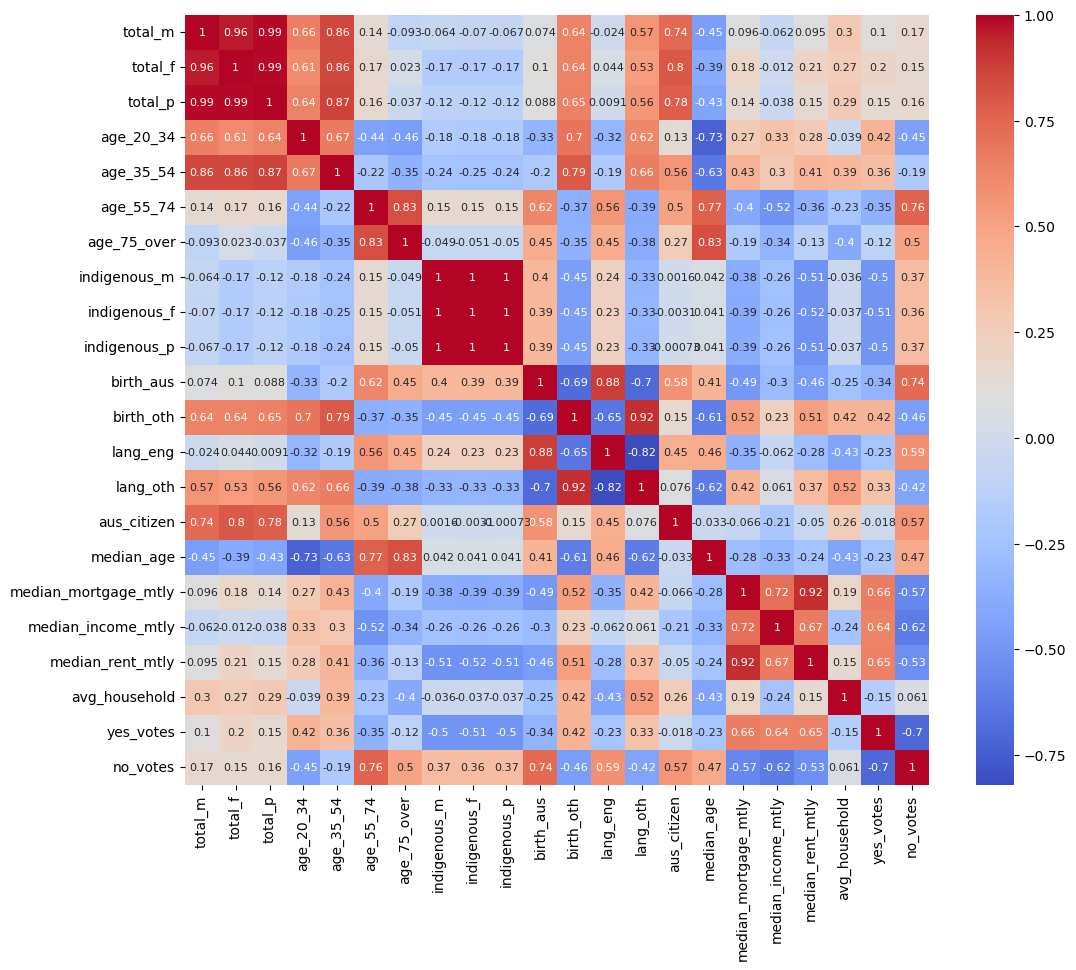

In [58]:
correlations_matrix = population_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm")
plt.show()

## Education & Relation Correlation Matrix

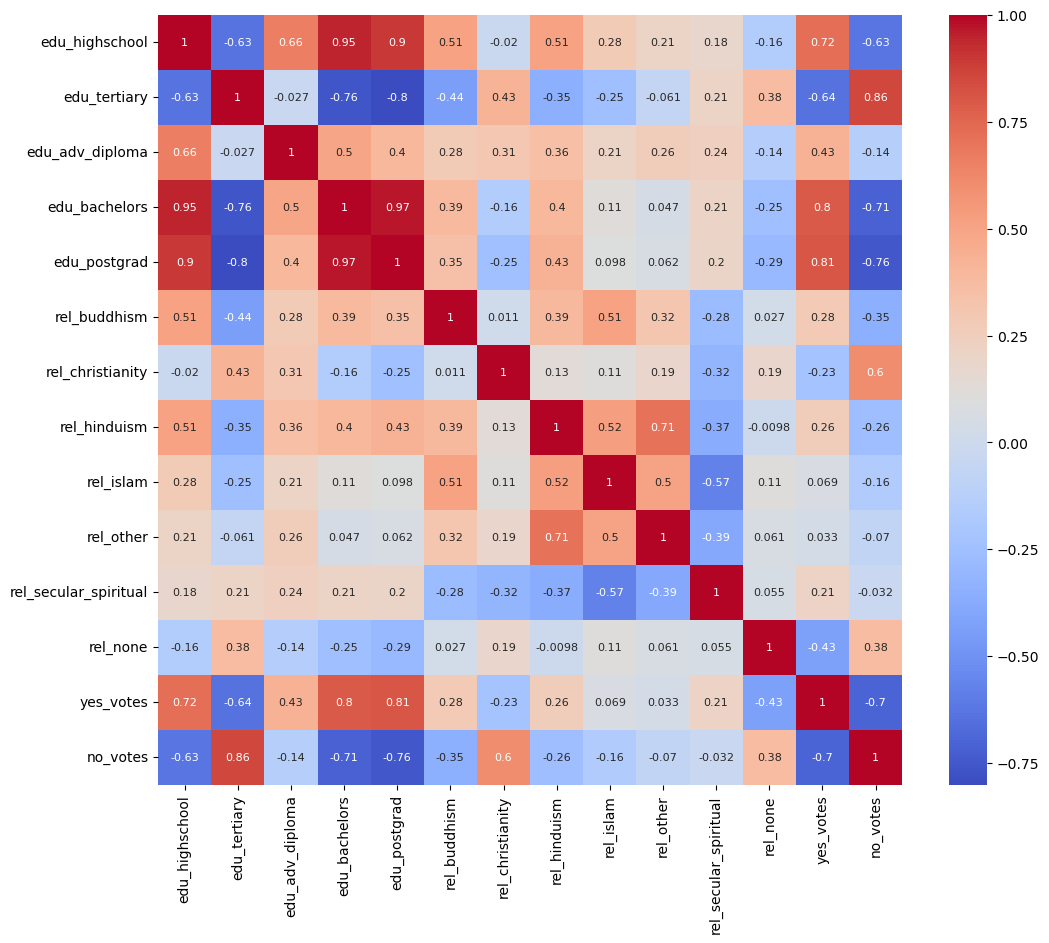

In [59]:
correlations_matrix = edu_rel_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm")
plt.show()

## Workforce Correlation Matrix

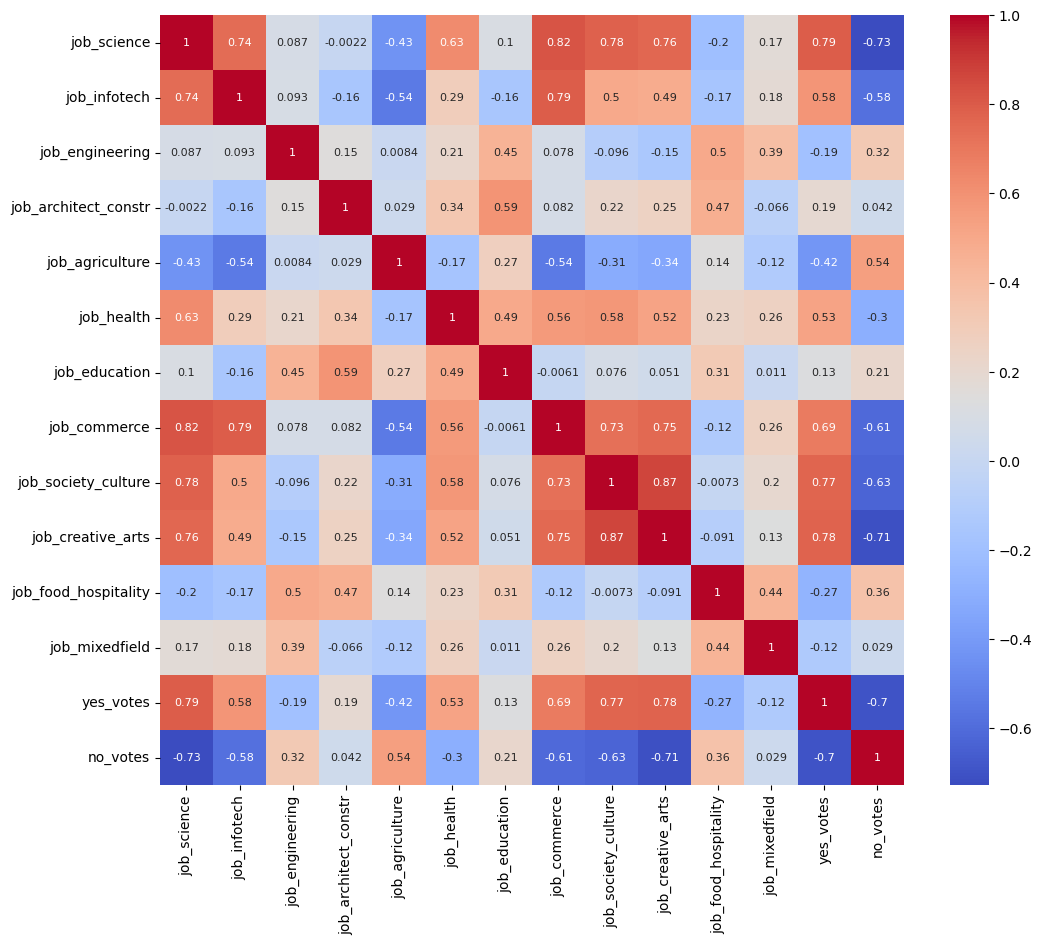

In [85]:
correlations_matrix = job_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm")
plt.show()

There seems to be correlation between how you vote, based on the following:

1. Age (Voters aged between 20 > 34 are more likely to vote YES)
2. Median Income affects how you vote (higher above the median likely to vote YES)
3. People with Christina religious beliefs correlate towards being NO votes.
4. Job sectors within Arts, Community, Culture and IT leanings towards YES votes.
5. Job sectors within Agriculture (farming) towards more NO votes.

# 5. Hypothesis Testing

Test an hypothesis to see if on average, if there are areas in which there are more than 67% of born in Australia there is a likelihood for that area to vote NO. The average % of people born in Australia across electoral areas is 67%.

In [ ]:
# Find the mean population of Indingenous, Australian-born and born-Overseas population

ind_percentage = (complete_df['indigenous_p'] / complete_df['total_p']).mean() * 100
print("Indigenous Percentage:", ind_percentage)

aus_percentage = (complete_df['birth_aus'] / complete_df['total_p']).mean() * 100
print("Aus Percentage:", aus_percentage)

oth_percentage = (complete_df['birth_oth'] / complete_df['total_p']).mean() * 100
print("Oth Percentage:", oth_percentage)

In [92]:
# Hypothesis test between two testing groups to test the H0 and H1
# H0 : There is no impact in areas with a higher than average population of people born in Australia.
# H1 : There is evidence to suggest there is an impact.


complete_df['no_votes_percentage'] = complete_df['no_votes'] / complete_df['total_votes']
http://localhost:8889/notebooks/IH-Labs/_MidProject/ray-midproject-referendum-v1.ipynb#
group1 = complete_df[complete_df['birth_aus'] / (complete_df['birth_oth'] + complete_df['birth_aus']) > 0.67]['no_votes_percentage']
group2 = complete_df[complete_df['birth_aus'] / (complete_df['birth_oth'] + complete_df['birth_aus']) <= 0.67]['no_votes_percentage']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False) 

alpha = 0.05

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is evidence to suggest that areas with are majority Australian will result in a NO vote.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence.")


T-statistic: 5.967851578405801
P-value: 2.2118546528351186e-08
Reject the null hypothesis: There is evidence to suggest that areas with are majority Australian will result in a NO vote.


In [63]:
# Confidence Interval

conf_interval = proportion_confint([group1.sum(), group2.sum()], [group1.count(), group2.count()], alpha=0.05)
print("Confidence Interval:", conf_interval)

Confidence Interval: (array([0.51960534, 0.21287496]), array([0.68185617, 0.80374472]))


# 6. Summary of Findings

Some key learnings after this analysis:

1. Median income did have an impact on how people voted (high over median you are more likely to vote YES).
2. Areas with a high percentage of indigenous population are more likely to vote NO.
3. No clear evidence if education levels have an impact on how you vote.
4. Areas with an above average population born overseas is inconclusive for voter preference.
5. There are interesting correlations when it comes to job sectors and how they vote.
6. The information is not defnitive since referendum data doesn't go into specifics of voter demographic.
7. Generally referendum votes leans towards NO since many people do not understand what would change.